In [11]:
from typing import List,TypedDict
from langgraph.graph import StateGraph

In [12]:
class AgentState(TypedDict):
    """
    Represents the state of the agent.
    """
    name: str
    age: int
    skills: List[str]
    result : str

In [13]:
def greeting_message(state:AgentState) -> AgentState:
    """"Adds a greeting message to the agent's state."""
    state['result'] = f"{state['name']}, Welcome to the system!"
    return state
def age_adder(state:AgentState) -> AgentState:
    """Adds user's age."""
    state['result'] += f" You are {state['age']} years old."
    return state
def skills_adder(state:AgentState) -> AgentState:
    """Adds user's skills."""
    if state['skills']:
        skills = ', '.join(state['skills'])
        state['result'] += f" Your skills are: {skills}."
    else:
        state['result'] += " You have no skills listed."
    return state

In [14]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_message)
graph.add_node("age_adder", age_adder)
graph.add_node("skills_adder", skills_adder)

graph.add_edge("greeter", "age_adder")
graph.add_edge("age_adder", "skills_adder")

graph.set_entry_point("greeter")
graph.set_finish_point("skills_adder")

app = graph.compile()

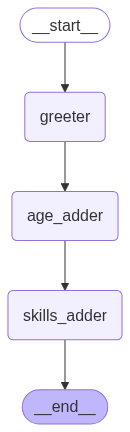

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
answer = app.invoke({"name": "John", "age": 30, "skills": ["Python", "AI"]})
print(answer['result'])

John, Welcome to the system! You are 30 years old. Your skills are: Python, AI.
